## 1. Read Salary dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
ds=pd.read_csv('salary.csv')

## 2. How many rows and how many columns the dataset has?

In [3]:
ds.shape

(32561, 15)

> There are 32561 rows and 15 columns in salary dataset.


## 3. How many missing values does each variable contain?

In [4]:
ds.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

## 4. Handling missing values

a)

In [5]:
ds['workclass'].replace('?', np.NaN,inplace=True)

In [6]:
ds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,Geder,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,NaN,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,NaN,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66,NaN,186061,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,NaN,Divorced,Machine-op-inspct,Unmarried,White,Female,NaN,3900.0,40.0,United-States,<=50K
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,NaN,3900.0,40.0,United-States,<=50K


In [7]:
ds.isna().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

b)

In [8]:
ds.drop(columns=['education.num','occupation','capital.gain','capital.loss','workclass'],axis=1,inplace=True)

In [9]:
ds.shape

(32561, 10)

c)

In [10]:
ds.dropna(axis = 0, how ='any',inplace=True) 

d)

In [11]:
ds.shape

(31527, 10)


## 5.

In [12]:
ds.columns=ds.columns.str.replace(".","_")

<ipython-input-12-18176185d55b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ds.columns=ds.columns.str.replace(".","_")


In [13]:
ds

,age,fnlwgt,education,marital_status,relationship,race,Geder,hours_per_week,native_country,income
0,90,77053,HS-grad,Widowed,Not-in-family,White,Female,40.0,United-States,<=50K
1,82,132870,HS-grad,Widowed,Not-in-family,White,Female,18.0,United-States,<=50K
2,66,186061,Some-college,Widowed,Unmarried,Black,Female,40.0,United-States,<=50K
3,54,140359,7th-8th,Divorced,Unmarried,White,Female,40.0,United-States,<=50K
4,41,264663,Some-college,Separated,Own-child,White,Female,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,Some-college,Never-married,Not-in-family,White,Male,40.0,United-States,<=50K
32557,27,257302,Assoc-acdm,Married-civ-spouse,Wife,White,Female,38.0,United-States,<=50K
32558,40,154374,HS-grad,Married-civ-spouse,Husband,White,Male,40.0,United-States,>50K
32559,58,151910,HS-grad,Widowed,Unmarried,White,Female,40.0,United-States,<=50K


## 6.

In [14]:
abs(ds.corr().round(2))

,age,fnlwgt,hours_per_week
age,1.00,0.08,0.10
fnlwgt,0.08,1.00,0.02
hours_per_week,0.10,0.02,1.00


> hours per week and age have the highest correlation in absolute value.

a)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

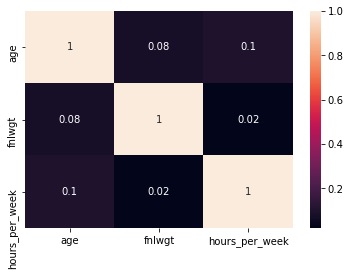

In [16]:
sns.heatmap(abs(ds.corr().round(2)),annot=True)

plt.show()

## 7.

In [17]:
print(ds.age.mean())
print(ds.age.median())
print(ds.age.min())
print(ds.age.max())
print(ds.age.std())

38.45196181051163
37.0
17
90
13.457003406740395


## 8.

a)

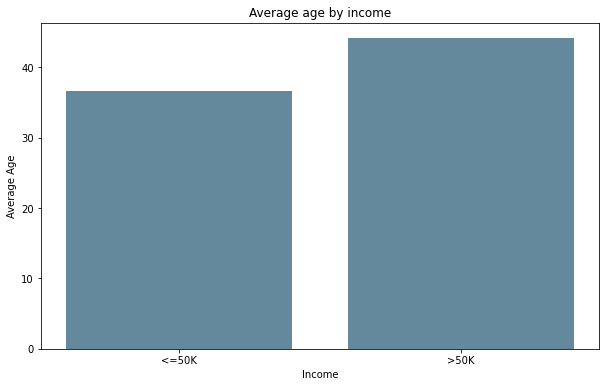

In [18]:
plt.figure(figsize=(10,6))
plt.bar(ds.income.unique(),ds.groupby(['income'])['age'].mean(),color=('#64899c'))
plt.xlabel('Income')
plt.ylabel('Average Age')
plt.title('Average age by income')
plt.show()

b)

In [19]:
import seaborn as sns

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


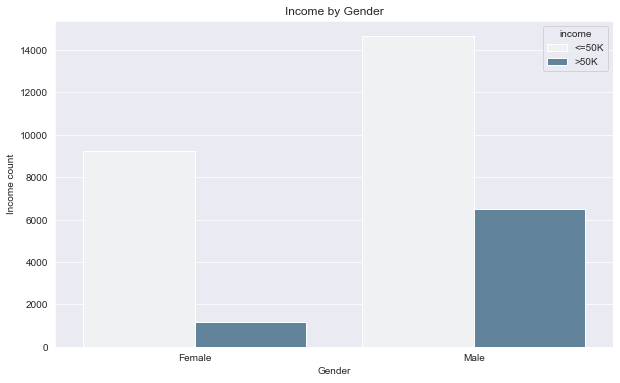

In [20]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(ds.Geder, hue=ds['income'], color="#5886a5")  
plt.xlabel('Gender')
plt.ylabel('Income count')
plt.title('Income by Gender')
plt.show() 

c)

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


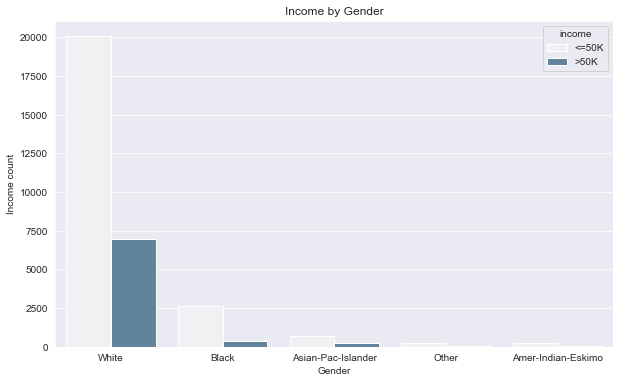

In [21]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(ds.race, hue=ds['income'], color="#5886a5")  
plt.xlabel('Gender')
plt.ylabel('Income count')
plt.title('Income by Gender')
plt.show() 

d)

/Users/artyomkhandanyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


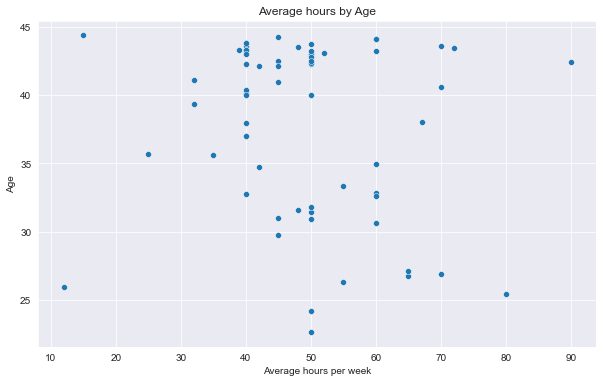

In [22]:
plt.figure(figsize=(10,6))

sns.set_style('darkgrid') 

sns.scatterplot(ds.hours_per_week,
            ds.groupby(['age'])['hours_per_week'].mean())
plt.xlabel('Average hours per week')
plt.ylabel('Age')
plt.title('Average hours by Age')
plt.show()

e)

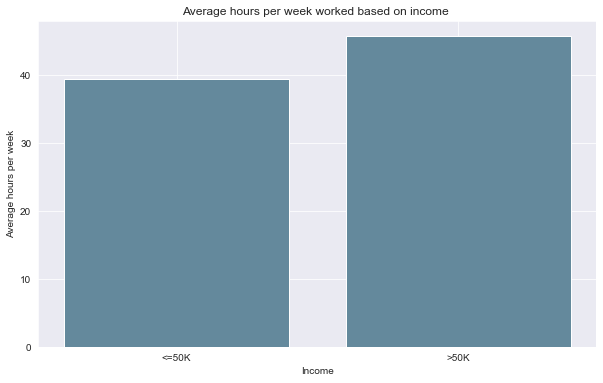

In [23]:
plt.figure(figsize=(10,6))
plt.bar(ds.income.unique(),ds.groupby(['income'])['hours_per_week'].mean(),color=('#64899c'))
plt.xlabel('Income')
plt.ylabel('Average hours per week')
plt.title('Average hours per week worked based on income ')
plt.show()

# 9.

In [24]:
data_numeric=ds.select_dtypes(exclude='object')
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31527 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31527 non-null  int64  
 1   fnlwgt          31527 non-null  int64  
 2   hours_per_week  31527 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB


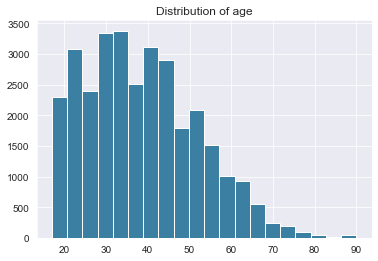

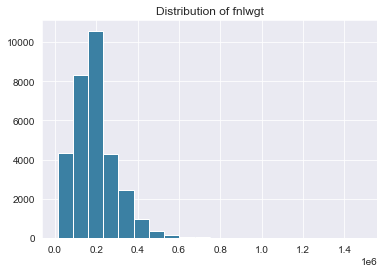

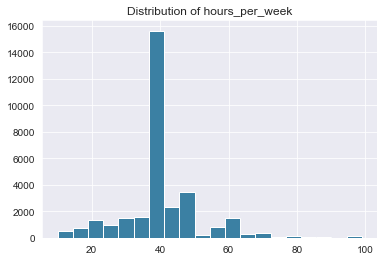

In [25]:
for i in data_numeric:
    plt.hist(data_numeric[i],color='#3b80a3',bins=20)
    plt.title(f"Distribution of {i}")
    plt.show()

# 10.

Form the collected data we can conclude that:

<li>People who are older that 40 years old tend to have a salary of more than 50K, wherease people who are less than 40 years old tend to have a salary of less that or equal to 50K. </li>
<li>More males that females tend to have an income of more than 50K. </li>
<li>White people are the majority in the workforce and comapred to other races they are the one's who tend to have a higher income. </li> 
<li>People, who work more than 40 hours on average tend to have a higher income (>50K).</li>

# 11.

In [26]:
import quandl 
from pandas_datareader import data 
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go 
init_notebook_mode(connected=True) 

In [27]:
stocks=['AAPL','MSFT','AMZN','FB','PINS']

In [28]:
data_stocks=data.DataReader(name=stocks,
                           data_source='yahoo',
                           start='2008-01-01',
                           end='2021-01-01',
                           pause=0.1)

In [29]:
data_stocks.head()

Attributes Adj Close                                    Close             \
Symbols         AAPL       MSFT       AMZN  FB PINS      AAPL       MSFT   
Date                                                                       
2008-01-02  5.983694  26.195889  96.250000 NaN  NaN  6.958571  35.220001   
2008-01-03  5.986459  26.307467  95.209999 NaN  NaN  6.961786  35.369999   
2008-01-04  5.529482  25.571117  88.790001 NaN  NaN  6.430357  34.380001   
2008-01-07  5.455470  25.742189  88.820000 NaN  NaN  6.344286  34.610001   
2008-01-08  5.259228  24.879400  87.879997 NaN  NaN  6.116071  33.450001   

Attributes                      ...      Open                                 \
Symbols          AMZN  FB PINS  ...      AAPL       MSFT       AMZN  FB PINS   
Date                            ...                                            
2008-01-02  96.250000 NaN  NaN  ...  7.116786  35.790001  95.349998 NaN  NaN   
2008-01-03  95.209999 NaN  NaN  ...  6.978929  35.220001  96.059998 NaN  NaN   
2008-01-04  88.790001 NaN  NaN  ...  6.837500  35.189999  93.260002 NaN  NaN   
2008-01-07  88.820000 NaN  NaN  ...  6.473214  34.549999  88.620003 NaN  NaN   
2008-01-08  87.879997 NaN  NaN  ...  6.433571  34.709999  87.550003 NaN  NaN   

Attributes        Volume                                   
Symbols             AAPL        MSFT        AMZN  FB PINS  
Date                                                       
2008-01-02  1.079179e+09  63004200.0  13858700.0 NaN  NaN  
2008-01-03  8.420664e+08  49599600.0   9122500.0 NaN  NaN  
2008-01-04  1.455832e+09  72090800.0  10270000.0 NaN  NaN  
2008-01-07  2.072193e+09  80164300.0   9981600.0 NaN  NaN  
2008-01-08  1.523816e+09  79148300.0  12283300.0 NaN  NaN  

[5 rows x 30 columns]

# 12.

In [30]:
data_stocks.columns=data_stocks.columns.map('_'.join)

In [31]:
data_stocks.head()

,Adj Close_AAPL,Adj Close_MSFT,Adj Close_AMZN,Adj Close_FB,Adj Close_PINS,Close_AAPL,Close_MSFT,Close_AMZN,Close_FB,Close_PINS,...,Open_AAPL,Open_MSFT,Open_AMZN,Open_FB,Open_PINS,Volume_AAPL,Volume_MSFT,Volume_AMZN,Volume_FB,Volume_PINS
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,5.983694,26.195889,96.250000,NaN,NaN,6.958571,35.220001,96.250000,NaN,NaN,...,7.116786,35.790001,95.349998,NaN,NaN,1.079179e+09,63004200.0,13858700.0,NaN,NaN
2008-01-03,5.986459,26.307467,95.209999,NaN,NaN,6.961786,35.369999,95.209999,NaN,NaN,...,6.978929,35.220001,96.059998,NaN,NaN,8.420664e+08,49599600.0,9122500.0,NaN,NaN
2008-01-04,5.529482,25.571117,88.790001,NaN,NaN,6.430357,34.380001,88.790001,NaN,NaN,...,6.837500,35.189999,93.260002,NaN,NaN,1.455832e+09,72090800.0,10270000.0,NaN,NaN
2008-01-07,5.455470,25.742189,88.820000,NaN,NaN,6.344286,34.610001,88.820000,NaN,NaN,...,6.473214,34.549999,88.620003,NaN,NaN,2.072193e+09,80164300.0,9981600.0,NaN,NaN
2008-01-08,5.259228,24.879400,87.879997,NaN,NaN,6.116071,33.450001,87.879997,NaN,NaN,...,6.433571,34.709999,87.550003,NaN,NaN,1.523816e+09,79148300.0,12283300.0,NaN,NaN


In [32]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AAPL,
                        mode='lines',
                        name='Opening price of AAPL'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_MSFT,
                        mode='lines',
                        name='Opening price of MSFT'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AMZN,
                        mode='lines',
                        name='Opening price of AMZN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_FB,
                        mode='lines',
                        name='Opening price of FB'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_PINS,
                        mode='lines',
                        name='Opening price of PINS'))

fig.update_layout(title='The change in opening prices over time (2008-2021)')

fig.show()

# 13.

In [33]:
for i in data_numeric.columns:
    histogram_num=go.Histogram(x=data_numeric[i])
    print(i)
    fig=go.Figure(histogram_num)

    fig.show()

age


fnlwgt


hours_per_week


> The distribution of age and fnlwgt are right skewed. So, we can see that majority of employees are of age 25 to 45 and fnlwgt is between 185K-190K.
The distribution of hours per week is normally distributed with a peak at 40 hours per week.